# Accessing all profiles at once 

Convenetly, all the core mision profiles are compated in a single file `<FloatWmoID>_prof.nc` 

In [2]:
import numpy as np
import xarray as xr
import netCDF4
from matplotlib import pyplot as plt
%matplotlib inline

In [19]:
prof  = xr.open_dataset('./Data/6901254/6901254_prof.nc')

In this case, N_PROF is 66, since there are 66 two for the first cycle, the descending and the ascending. This profiles are just the 'Primary sampling', if you need the high resotuion upper 5dbar you ave to use the indvidual cycle files.

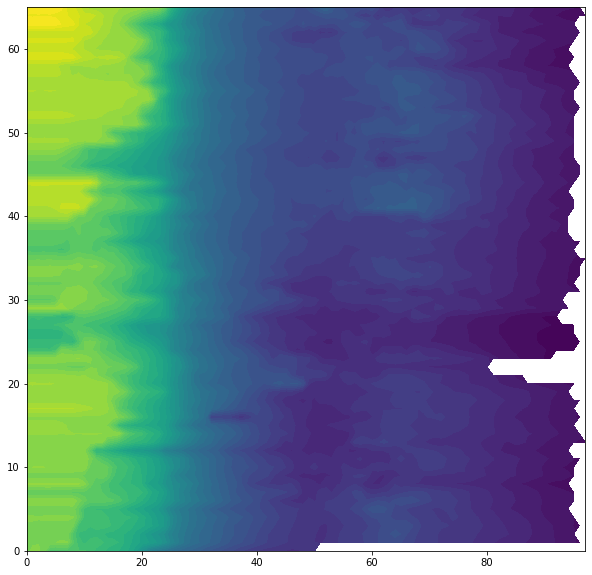

In [20]:
fig , ax = plt.subplots(figsize=(10,10))
ax.contourf(prof.PSAL,40)

However, if we want to add the proper pressure levels, since each profile have slighly different levels

In [4]:
prof.PRES[3,:].values

array([   6.,    7.,    8.,    9.,   10.,   16.,   25.,   36.,   46.,
         55.,   66.,   76.,   86.,   96.,  106.,  115.,  125.,  135.,
        146.,  156.,  165.,  176.,  186.,  196.,  213.,  237.,  262.,
        288.,  313.,  338.,  363.,  388.,  413.,  438.,  463.,  488.,
        513.,  538.,  563.,  588.,  613.,  638.,  663.,  687.,  713.,
        738.,  763.,  788.,  813.,  838.,  863.,  888.,  914.,  938.,
        963.,  988., 1013., 1038., 1063., 1088., 1113., 1139., 1163.,
       1188., 1213., 1238., 1263., 1288., 1313., 1338., 1363., 1388.,
       1413., 1439., 1463., 1488., 1513., 1538., 1563., 1588., 1613.,
       1638., 1663., 1688., 1713., 1738., 1763., 1788., 1813., 1838.,
       1863., 1888., 1913., 1938., 1963., 1988., 2013., 2036.],
      dtype=float32)

In [5]:
prof.PRES[4,:].values

array([   6.,    7.,    8.,    9.,   10.,   16.,   25.,   35.,   45.,
         55.,   66.,   75.,   85.,   95.,  106.,  116.,  125.,  135.,
        145.,  156.,  165.,  175.,  186.,  196.,  213.,  238.,  263.,
        287.,  313.,  338.,  363.,  388.,  413.,  438.,  463.,  488.,
        513.,  538.,  563.,  588.,  613.,  638.,  663.,  689.,  713.,
        738.,  763.,  788.,  813.,  838.,  863.,  889.,  913.,  938.,
        963.,  988., 1013., 1038., 1063., 1089., 1113., 1138., 1163.,
       1188., 1213., 1238., 1263., 1289., 1313., 1338., 1363., 1388.,
       1413., 1438., 1462., 1488., 1513., 1538., 1563., 1588., 1613.,
       1639., 1663., 1688., 1713., 1737., 1763., 1788., 1813., 1837.,
       1863., 1888., 1913., 1938., 1963., 1978.,   nan,   nan],
      dtype=float32)

we will need to do a little of interpolation to use contour:

In [6]:
juld=prof.JULD.values
psal=prof.PSAL.values
pres=prof.PRES.values
prei=np.arange(5,2005,5)

psali= np.zeros((juld.shape[0],prei.shape[0]))
psali.fill(np.nan)

for ip in range(0,66):
    psali[ip,:]=np.interp(prei,pres[ip,:],psal[ip,:])

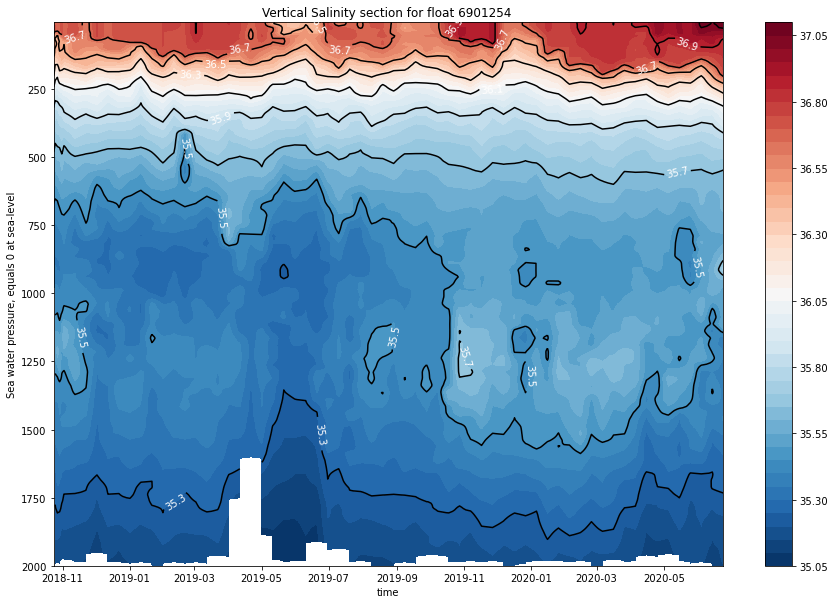

In [10]:
fig, ax = plt.subplots(figsize=(15,10))

cs=ax.contourf(juld,prei,psali.transpose(),40,cmap="RdBu_r")
cs2=ax.contour(juld,prei,psali.transpose(),colors=('k'), levels=cs.levels[::4])

ax.invert_yaxis()
ax.clabel(cs2, fmt='%2.1f', colors='w', fontsize=10)

ax.set_title(f"Vertical Salinity section for float {prof.PLATFORM_NUMBER[0].astype(str).values}")
ax.set_xlabel(f"{prof.JULD.standard_name}")
ax.set_ylabel(f"{prof.PRES.long_name}")

cbar=fig.colorbar(cs,ax=ax)

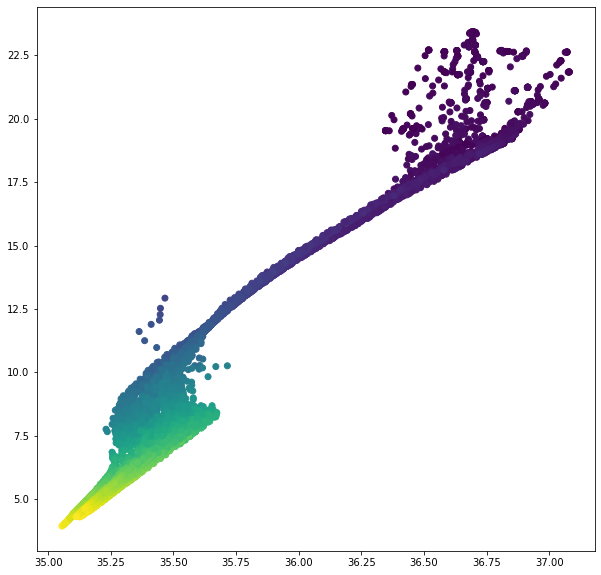

In [21]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(prof.PSAL,prof.TEMP,c=prof.PRES)

### metadata